The Network Laplacian is a representation of a graph, but the Laplacian operates on the $n$-dimensional vector space of functions 
$$f : V\to\mathbb{R} .$$

Consider the tensor space
$$ \mathcal{L}^2 (G,V) = \{f:G\to V\} $$
and note that $f$ is a vector valued function space:
$$f = \begin{bmatrix} f(g_1) \\ \vdots \\ f(g_n)   \end{bmatrix}
= \begin{bmatrix} \vec{v_1} \\ \vdots \\ \vec{v_n}   \end{bmatrix} . $$
Furthermore, there exists some matrix $A$ for which:
$$Af = 
\begin{bmatrix}
A_{11} & \cdots & A_{1n} \\
\vdots & \ddots & \vdots \\
A_{n1} & \cdots & A_{nn} \\
\end{bmatrix}
\begin{bmatrix}
\vec{v_1} \\
\vdots \\
\vec{v_n}
\end{bmatrix}.$$

For transformations between these spaces on $\mathbb{R}$, $A$ is just a matrix. However, transformations on $\mathbb{R}^m$ is a block matrix or a matrix of matrices.

Consider some undirected graph $G$:

In [2]:
#Import Packages

%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
import torch
import kornia
import scipy.sparse
import os
from scipy.sparse.linalg import spsolve, cg

Nodes of graph: 
[1, 2, 3, 4]
Edges of graph: 
[(1, 2), (1, 4), (2, 3), (3, 4)]


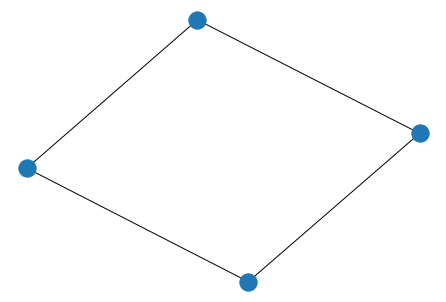

In [3]:
from matplotlib import pyplot as plt
import networkx as nx
G=nx.Graph()

# adding nodes
# G.add_nodes_from([1,4])

G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(4,1)

print("Nodes of graph: ")
print(G.nodes())
print("Edges of graph: ")
print(G.edges())

nx.draw(G)
plt.show(G)

Note that the Network Laplacian is $L = D-A$ where $D$ is the degree matrix and $A$ is the adjacency matrix. For this graph $G$ we get

$$  D = 
\begin{bmatrix} 
2 & 0 & 0 & 0 \\
0 & 2 & 0 & 0 \\
0 & 0 & 2 & 0 \\
0 & 0 & 0 & 2 \\
\end{bmatrix} \mbox{ and }
A = 
\begin{bmatrix} 
0 & 1 & 0 & 1 \\
1 & 0 & 1 & 0 \\
0 & 1 & 0 & 1 \\
1 & 0 & 1 & 0 \\
\end{bmatrix} .$$

Hence, the Network Laplacian for graph $G$ is 

$$ L = D-A = 
\begin{bmatrix} 
2 & -1 & 0 & -1 \\
-1 & 2 & -1 & 0 \\
0 & -1 & 2 & -1 \\
-1 & 0 & -1 & 2 \\
\end{bmatrix} .$$

The case in which each node is mapped to a value in $\mathbb{R}$ is shown below. The Network Laplacian is calculated for G.

In [4]:
import numpy as np
# Can input any values for a, c, b, d
a = 11
b = 10
c = 10
d = 10
regvec = np.array([[a, b, c, d]])
regvec = regvec.T
regvec

array([[11],
       [10],
       [10],
       [10]])

In [5]:
matrixLap = np.block([[2, -1, 0, -1],
                    [-1, 2, -1, 0],
                    [0, -1, 2, -1],
                    [-1, 0, -1, 2],])
matrixLap

array([[ 2, -1,  0, -1],
       [-1,  2, -1,  0],
       [ 0, -1,  2, -1],
       [-1,  0, -1,  2]])

In [6]:
# Regular Laplacian for normal graph G
matrixLap @ regvec

array([[ 2],
       [-1],
       [ 0],
       [-1]])

The case in which we are interested occurs when each node is a vector in $\mathbb{R}^n$ mapped to another vector in $\mathbb{R}^n$. The Laplacian can be thought of as a function $f\in \mathcal{L}(G,\mathbb{R}^2)$ where $A:\mathcal{L}(G,\mathbb{R}^2)\to\mathcal{L}(G,\mathbb{R}^2)$. Furthermore, $f$ is an 8-dimensional function where 
$$f = \begin{bmatrix}
\vec{v_1} \\
\vec{v_2} \\
\vec{v_3} \\
\vec{v_4} \\
\end{bmatrix},
\vec{v_j} = 
\begin{bmatrix}
x_j \\
y_j \\
\end{bmatrix}.$$

For the linear transformation on this space, we have
$$Af = 
\begin{bmatrix}
A_{11} & A_{12} & A_{13} & A_{14} \\
A_{21} & A_{22} & A_{23} & A_{24} \\
A_{31} & A_{32} & A_{33} & A_{34} \\
A_{41} & A_{42} & A_{43} & A_{44} \\
\end{bmatrix}
\begin{bmatrix}
\vec{v_1} \\
\vec{v_2} \\
\vec{v_3} \\
\vec{v_4} \\
\end{bmatrix} =
\begin{bmatrix}
A_{11}\vec{v}_1 + A_{12}\vec{v}_2 + A_{13}\vec{v}_3 + A_{14}\vec{v}_4 \\
A_{21}\vec{v}_1 + A_{22}\vec{v}_2 + A_{23}\vec{v}_3 + A_{24}\vec{v}_4 \\
A_{31}\vec{v}_1 + A_{32}\vec{v}_2 + A_{33}\vec{v}_3 + A_{34}\vec{v}_4 \\
A_{41}\vec{v}_1 + A_{42}\vec{v}_2 + A_{43}\vec{v}_3 + A_{44}\vec{v}_4 \\
\end{bmatrix}
$$
<!-- $$
= \begin{bmatrix}
\begin{bmatrix} a_{11} & b_{11} \\ c_{11} & d_{11} \end{bmatrix}
& \begin{bmatrix} a_{12} & b_{12} \\ c_{12} & d_{12} \end{bmatrix} 
& \begin{bmatrix} a_{13} & b_{13} \\ c_{13} & d_{13} \end{bmatrix}
& \begin{bmatrix} a_{14} & b_{14} \\ c_{14} & d_{14} \end{bmatrix}           \\
\begin{bmatrix} a_{21} & b_{21} \\ c_{21} & d_{21} \end{bmatrix} & \begin{bmatrix} a_{22} & b_{22} \\ c_{22} & d_{22} \end{bmatrix} 
& \begin{bmatrix} a_{23} & b_{23} \\ c_{23} & d_{23} \end{bmatrix}
& \begin{bmatrix} a_{24} & b_{24} \\ c_{24} & d_{24} \end{bmatrix}           \\
\begin{bmatrix} a_{31} & b_{31} \\ c_{31} & d_{31} \end{bmatrix}& \begin{bmatrix} a_{32} & b_{32} \\ c_{32} & d_{32} \end{bmatrix} 
& \begin{bmatrix} a_{33} & b_{33} \\ c_{33} & d_{33} \end{bmatrix}
& \begin{bmatrix} a_{34} & b_{34} \\ c_{34} & d_{34} \end{bmatrix}           \\
\begin{bmatrix} a_{41} & b_{41} \\ c_{41} & d_{41} \end{bmatrix} & \begin{bmatrix} a_{42} & b_{42} \\ c_{42} & d_{42} \end{bmatrix} 
& \begin{bmatrix} a_{43} & b_{43} \\ c_{43} & d_{43} \end{bmatrix}
& \begin{bmatrix} a_{44} & b_{44} \\ c_{44} & d_{44} \end{bmatrix}           \\
\end{bmatrix}
\begin{bmatrix}
\begin{bmatrix} x_1 \\ y_1 \end{bmatrix}   \\   \begin{bmatrix} x_2 \\ y_2 \end{bmatrix} \\
\begin{bmatrix} x_3 \\ y_3 \end{bmatrix}   \\   \begin{bmatrix} x_4 \\ y_4 \end{bmatrix}
\end{bmatrix}
$$

$$A_{11} \otimes \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
\end{bmatrix}  + A_{12} \otimes \begin{bmatrix}
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
\end{bmatrix} + \ldots$$ -->




The Laplacian "smooths the given tensor with a laplacian kernel by convolving it to each channel. It supports batched operation." (kornia documentation)

In [7]:
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [8]:
zr2 = np.zeros((3,3))
zr2[1,0] = 1

zr2, matrixLap[0,0]*np.identity(2)

(array([[0., 0., 0.],
        [1., 0., 0.],
        [0., 0., 0.]]),
 array([[2., 0.],
        [0., 2.]]))

In [9]:
np.kron(zr2, matrixLap[0,0]*np.identity(2))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [2., 0., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [10]:
def KronTensorDecomp(nodes, dim, regularLap):
    matlist = []
    for i in range(nodes):
        for j in range(nodes):
            zer = np.zeros((nodes,nodes))
            zer[i,j] = 1
            section = np.kron(zer,(regularLap[i,j]*np.identity(dim)))
            matlist.append(section)
    Ak = np.zeros((section.shape))        
    for k in range(nodes*nodes):
        Ak = Ak + matlist[k]
    return  Ak
    
x12 = KronTensorDecomp(4, 1, matrixLap)
x12

array([[ 2., -1.,  0., -1.],
       [-1.,  2., -1.,  0.],
       [ 0., -1.,  2., -1.],
       [-1.,  0., -1.,  2.]])